In [2]:
#importing liberaries needed
#!pip install fuzzywuzzy
import pandas as pd
import numpy as np
import re
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns # For plotting

C:\Users\Dell\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
#Installing the data we are working with
da = pd.read_csv("D:/Data/candyhierarchy2017.csv",encoding ='latin1')

In [4]:
da.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


# working with columns

we see that not all columns we can see

In [5]:
#show the columns that we can't see in data
pd.set_option('display.max_columns', None)
da.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | HersheyÕs Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&MÕs,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [6]:
#new column that contains the last 4 columns together
da['Media'] = da['Q12: MEDIA [Daily Dish]']


# This code puts the last 4 columns in columns in Media column
da.loc[da['Q12: MEDIA [Daily Dish]']==1.,"Media"] = 'Daily Dish'
da.loc[da['Q12: MEDIA [Science]']==1.,"Media"] = 'Sience'
da.loc[da['Q12: MEDIA [ESPN]']==1. , 'Media'] = 'ESPN'
da.loc[da['Q12: MEDIA [Yahoo]']==1. , 'Media'] = 'Yahoo'

lets make sure that our ew olumn contains the data we excpect

In [7]:
#checking data in Media column
da['Media'] = da["Media"]
da['Media'].value_counts()

Sience        1362
ESPN            99
Daily Dish      85
Yahoo           67
Name: Media, dtype: int64

There are alot of columns we dont realy need in the dataframe so we r going to drop it

In [8]:
#dropping unnecessary columns
da = da.drop(columns = ['Internal ID','Q7: JOY OTHER', 'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS',
                   'Q10: DRESS', 'Unnamed: 113', 'Q12: MEDIA [Daily Dish]','Q12: MEDIA [Science]',
                   'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]','Click Coordinates (x, y)',
                        'Q5: STATE, PROVINCE, COUNTY, ETC','Q1: GOING OUT?'])

The rest of the column names are unorganised and we dont need the questions order in 
it so we remove the question order 

In [9]:

#Rename the columns that doesnt need loop
da=da.rename(columns = {'Q11: DAY':'DAY','Q2: GENDER':'GENDER','Q3: AGE':'AGE','Q4: COUNTRY':'Country'})

i = ''   #initial variable to contain every column name

for item in da.columns[3:106]:
    i = item.replace('Q6 |','')              #This loop to rename the columns that start with Q6
    i = i.lstrip()
    da= da.rename(columns = {item:i})

In [10]:
da.head()

,GENDER,AGE,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we donÕt know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,HersheyÕs Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&MÕs,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,ReeseÕs Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DAY,Media
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Sunday,Sience
2,Male,49,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,40,us,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,

# working with rows

Now after we did what was needed in the columns lets get into the rows 


We see that many rows have nan values so lets deal with this by dropping them or filling them

In [11]:
# First is to drop rows that cant be filled by us
da.dropna(subset =['GENDER','Country','DAY','Media'],inplace = True)

# Adding numeric value to the AGE column to make it easy to convert it to int in the next few steps
da['AGE'] = da['AGE'].fillna('00')
da['AGE'] = da['AGE'] + '00'

In [12]:
#checking what we have now in the AGE column
da['AGE'].unique()

array(['4400', '4000', '2300', '3300', '5300', '5600', '6400', '4300',
       '3700', '5900', '4800', '4500', '3400', '3500', '3800', '5800',
       '5000', '4700', '5200', '6300', '4100', '4900', '3100', '6100',
       '4600', '5400', '6200', '2900', '4200', '3900', '3600', '3200',
       '2800', '6900', '6700', '3000', '2500', '5100', '7000', '6500',
       '2400', '2700', '1800', '1900', 'Old enough00', '5700', '6600',
       '1200', 'Many00', '6000', '5500', '2200', '?00', '2100', '1100',
       'no00', '2000', '600', '1000', '6800', '7100', '9000', '0000',
       '1300', '2600', '45-5500', '31200', '7200', '9900', 'hahahahaha00',
       '900', '8800', '7400', '10200', 'older than dirt00', '1500', '800',
       '7500', '1700', 'Enough00', 'See question 200', '24-5000', '700',
       '1400', '7600', '10000', '100000', 'ancient00', '1600', '7700',
       'old00', 'MY NAME JEFF00', '400', '7300',
       '59 on the day after Halloween00', 'old enough00'], dtype=object)

In the next step we use regex to extract the ages in AGE column

In [13]:
l1 = [] # List to contain the regex lists
l2 = [] # List to contain the needed ages
age = ''
regex = re.compile(r'(\d\d){1}')

In [14]:
for i in da['AGE']:
    age = regex.findall(str(i))          # Extracting the matches from each row
    l1.append(age)

In [15]:
for i in range(len(l1)):                # Filling the list with ages
    l2.append(l1[i][0])

In [16]:
da['AGE'] = l2                          # Renew the AGE column
da['AGE'].unique()

array(['44', '40', '23', '33', '53', '56', '64', '43', '37', '59', '48',
       '45', '34', '35', '38', '58', '50', '47', '52', '63', '41', '49',
       '31', '61', '46', '54', '62', '29', '42', '39', '36', '32', '28',
       '69', '67', '30', '25', '51', '70', '65', '24', '27', '18', '19',
       '00', '57', '66', '12', '60', '55', '22', '21', '11', '20', '10',
       '68', '71', '90', '13', '26', '72', '99', '88', '74', '15', '80',
       '75', '17', '14', '76', '16', '77', '73'], dtype=object)

Now the AGE column has the neede values but its in type srt

In [17]:
da['AGE'] = da['AGE'].astype(int)       # Convert ages to int

# Fill the nan values in AGE column with the mean age
da.loc[da['AGE'] == 0,'AGE'] = int(da['AGE'].mean())  

In [18]:
da['AGE'].unique()                     # Make sure that we on the right way 

array([44, 40, 23, 33, 53, 56, 64, 43, 37, 59, 48, 45, 34, 35, 38, 58, 50,
       47, 52, 63, 41, 49, 31, 61, 46, 54, 62, 29, 42, 39, 36, 32, 28, 69,
       67, 30, 25, 51, 70, 65, 24, 27, 18, 19, 57, 66, 12, 60, 55, 22, 21,
       11, 20, 10, 68, 71, 90, 13, 26, 72, 99, 88, 74, 15, 80, 75, 17, 14,
       76, 16, 77, 73])

In [19]:
da['Country'].unique()

array(['USA ', 'us', 'usa', 'canada', 'Canada', 'Us', 'US', 'Murica',
       'USA', 'uk', 'United States', 'united states', 'United staes',
       'United Kingdom', 'United States of America', 'UAE',
       'United States ', 'England', 'Usa', 'canada ', 'United states',
       'USAUSAUSA', 'america', 'france', 'United States of America ',
       'U.S.A.', 'Mexico', 'Canada ', 'united states of america',
       'US of A', 'UK', 'Unites States', 'The United States',
       'North Carolina ', 'Netherlands', 'Earth', 'U S', 'Costa Rica',
       'The United States of America', 'insanity lately', 'Greece',
       'USA? Hard to tell anymore..', 'u.s.', "'merica", 'United State',
       'France', 'U.S.', 'A', 'Can', 'Canae', 'Trumpistan', 'Ireland',
       'United Sates', 'Korea', 'Australia', 'California', 'Japan', 'USa',
       'I pretend to be from Canada, but I am really from the United States.',
       'Usa ', 'Iceland', 'Scotland', 'Denmark', 'France ', 'Uk',
       'Switzerland', 'Ahem.

We notice that one country may be written in many ways so we create  list of countries to use it 

In [20]:

# Countries without any repetition
countries = ['USA','United States','Canada','Murica','United Kingdom','UK','England','France','Finland',
            'Mexico','Corolina','Netherlands','Germany','Costa rica','Australia','Greece',
            'Can','Trumpistan','Ireland','Korea','Japan','South africa','Scotland','Denmark',
            'Switzerland','Indonesia','Sovietn canuckistan','Singapore','China','Taywan']

In [21]:
# Used extract method to get the countries names without reprtition
for country in countries:
    matches = process.extract(country,da['Country'],limit = da.shape[0])
    for match in matches:
        if match[1]>=80:
            da.loc[da['Country']==match[0], 'Country'] = country

In [22]:
da['Country'].unique()

array(['USA', 'Sovietn canuckistan', 'Murica', 'UK', 'United States',
       'United Kingdom', 'UAE', 'England', 'america', 'France', 'U.S.A.',
       'Mexico', 'US of A', 'North Carolina ', 'Netherlands', 'Earth',
       'Costa rica', 'insanity lately', 'Greece',
       'USA? Hard to tell anymore..', 'Trumpistan', 'Ireland', 'Korea',
       'Australia', 'California', 'Japan', 'Scotland', 'Denmark',
       'Switzerland', 'Ahem....Amerca', 'New Jersey', 'Germany',
       'America', 'Atlantis', 'murrika', 'N. America', 'Singapore',
       'Taywan', 'China', 'spain', 'Narnia', 'u s a',
       'subscribe to dm4uz3 on youtube', "I don't know anymore"],
      dtype=object)

We see that not all countries were fixed so we fix the rest manually

In [23]:
da = da.replace(['United States','u.s.a.','america', 'U.S.A.','US of A'
                           ,'USA? Hard to tell anymore..','America','N. America'
                           ,'New Jersey','u s a','subscribe to dm4uz3 on youtube'
                           ,"I don't know anymore",'Fear and Loathing'],'USA')

In [24]:
da['Country'].unique()

array(['USA', 'Sovietn canuckistan', 'Murica', 'UK', 'United Kingdom',
       'UAE', 'England', 'France', 'Mexico', 'North Carolina ',
       'Netherlands', 'Earth', 'Costa rica', 'insanity lately', 'Greece',
       'Trumpistan', 'Ireland', 'Korea', 'Australia', 'California',
       'Japan', 'Scotland', 'Denmark', 'Switzerland', 'Ahem....Amerca',
       'Germany', 'Atlantis', 'murrika', 'Singapore', 'Taywan', 'China',
       'spain', 'Narnia'], dtype=object)

In [25]:
da.head()

,GENDER,AGE,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we donÕt know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,HersheyÕs Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&MÕs,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,ReeseÕs Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DAY,Media
1,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Sunday,Sience
3,Male,40,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,Sunday,Sience
4,Male,23,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,Friday,Sience
7,Male,33,Sovietn canuckistan,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY

Now to make sure that there is no nan values in the candy columns we replace them

In [26]:
# Replacing null values with MEH
for item in da.columns[3:106]:
    da[item] = da[item].fillna(da[item].mode())

Now the data is clean !!

In [27]:
da = da.reset_index()
da.head()

,index,GENDER,AGE,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we donÕt know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,HersheyÕs Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&MÕs,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,ReeseÕs Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DAY,Media
0,1,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Sunday,Sience
1,3,Male,40,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,Sunday,Sience
2,4,Male,23,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,Friday,Sience
3,7,Male,33,Sovietn canuckistan,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPA

In [28]:
da = da.drop(columns = ['index'])

# Finding the desired candy

First I create a dataframe counting the scores for every candy type

In [38]:
list1 = []
data = []
for item in da.columns[3:106]:
    list1 = [item,da.loc[da[item] == 'JOY'].shape[0],da.loc[da[item] == 'MEH'].shape[0],da.loc[da[item] == 'DESPAIR'].shape[0]]
    data.append(list1)

In [43]:
df = pd.DataFrame(data,columns = ['Name','JOY','MEH','DESPAIR'])    
df.head()

,Name,JOY,MEH,DESPAIR
0,100 Grand Bar,772,664,72
1,Anonymous brown globs that come in black and o...,150,398,968
2,Any full-sized candy bar,1378,178,14
3,Black Jacks,81,539,700
4,Bonkers (the candy),101,765,429


Now its easy to find the the most and the least desired candy in the data

In [41]:
df.nlargest(5,['JOY']) #the most 5 desired candies

,Name,JOY,MEH,DESPAIR
2,Any full-sized candy bar,1378,178,14
75,ReeseÕs Peanut Butter Cups,1313,165,90
14,"Cash, or other forms of legal tender",1273,236,57
44,Kit Kat,1272,254,48
96,Twix,1254,241,66


In [42]:
df.nlargest(5,['DESPAIR']) #the most 5 undesired candies

,Name,JOY,MEH,DESPAIR
8,Broken glow stick,20,89,1439
74,Real Housewives of Orange County Season 9 Blue...,77,123,1308
28,Gum from baseball cards,38,202,1295
100,White Bread,37,182,1290
42,Kale smoothie,88,145,1281


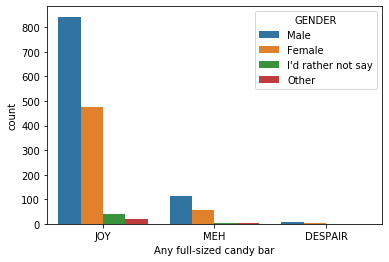

In [53]:
sns.countplot(x = da['Any full-sized candy bar'],data = da , hue = 'GENDER') 

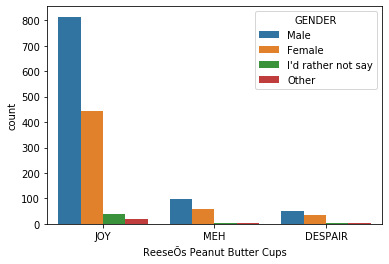

In [55]:
sns.countplot(x = da['ReeseÕs Peanut Butter Cups'],data = da , hue = 'GENDER') 

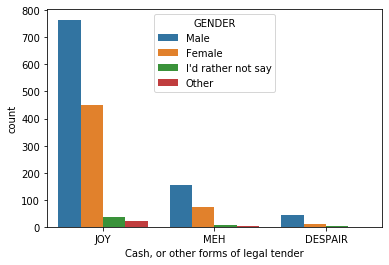

In [56]:
sns.countplot(x = da['Cash, or other forms of legal tender'],data = da , hue = 'GENDER') 